In [4]:
import numpy as np
import matplotlib.pyplot as plt
from geopandas import GeoSeries, GeoDataFrame, read_file
from shapely.geometry import Point
from pandas import Series, pandas as pd
import folium
%matplotlib inline

In [5]:
bcn_comerc = pd.read_csv('2016_cens_locals_plantabaixa.csv')

/Users/ernestoarredondomartinez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
bcn_comerc.head()

,ID_BCN,ID_PRINCIP,N_PRINCIP,ID_SECTOR,N_SECTOR,ID_GRUPACT,N_GRUPACT,ID_ACT,N_ACT,N_LOCAL,...,Nom_Barri,Codi_Districte,N_DISTRI,N_EIX,SN_EIX,SEC_CENS,Y_UTM_ETRS,X_UTM_ETRS,LATITUD,LONGITUD
0,49,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580750.861,431675.395,41.375377,2.182944
1,50,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580752.167,431687.786,41.375390,2.183092
2,51,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,SPRINGFIELD,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580753.613,431698.242,41.375404,2.183217
3,52,1,Actiu,1,Comerç al detall,4,Equipament personal,4000,Calçat i pell,CASAS KIDS,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.360,431709.717,41.375420,2.183354
4,53,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.700,431723.319,41.375425,2.183517


In [7]:
bcn_comerc["N_DISTRI"].unique()

array(['Ciutat Vella', 'Eixample', 'Les Corts', 'Sant Martí',
       'Nou Barris', 'Sant Andreu', 'Sants-Montjuïc',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó'], dtype=object)

In [8]:
cit_vella_comerc = bcn_comerc[bcn_comerc["N_DISTRI"] == "Ciutat Vella"]
cit_vella_comerc.size

265710

In [9]:
pts_lon_lat = [Point(xy) for xy in zip(bcn_comerc.LONGITUD, bcn_comerc.LATITUD)]
crs = {'init': 'epsg:4326'}
gdf_bcn_comerc = GeoDataFrame(bcn_comerc, crs=crs, geometry=pts_lon_lat)
gdf_bcn_comerc.head()

,ID_BCN,ID_PRINCIP,N_PRINCIP,ID_SECTOR,N_SECTOR,ID_GRUPACT,N_GRUPACT,ID_ACT,N_ACT,N_LOCAL,...,Codi_Districte,N_DISTRI,N_EIX,SN_EIX,SEC_CENS,Y_UTM_ETRS,X_UTM_ETRS,LATITUD,LONGITUD,geometry
0,49,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,...,1,Ciutat Vella,NaN,0,1030,4580750.861,431675.395,41.375377,2.182944,POINT (2.182944 41.375377)
1,50,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,...,1,Ciutat Vella,NaN,0,1030,4580752.167,431687.786,41.375390,2.183092,POINT (2.183092 41.37539)
2,51,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,SPRINGFIELD,...,1,Ciutat Vella,NaN,0,1030,4580753.613,431698.242,41.375404,2.183217,POINT (2.183217 41.375404)
3,52,1,Actiu,1,Comerç al detall,4,Equipament personal,4000,Calçat i pell,CASAS KIDS,...,1,Ciutat Vella,NaN,0,1030,4580755.360,431709.717,41.375420,2.183354,POINT (2.183354 41.37542)
4,53,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,...,1,Ciutat Vella,NaN,0,1030,4580755.700,431723.319,41.375425,2.183517,POINT (2.183517 41.375425)


In [10]:
gdf_indexed_by_cod_distr = gdf_bcn_comerc.set_index("Codi_Districte")
gdf_indexed_by_cod_distr = gdf_indexed_by_cod_distr.sort_index()

In [11]:
gdf_indexed_by_cod_distr.head()

,ID_BCN,ID_PRINCIP,N_PRINCIP,ID_SECTOR,N_SECTOR,ID_GRUPACT,N_GRUPACT,ID_ACT,N_ACT,N_LOCAL,...,Nom_Barri,N_DISTRI,N_EIX,SN_EIX,SEC_CENS,Y_UTM_ETRS,X_UTM_ETRS,LATITUD,LONGITUD,geometry
Codi_Districte,,,,,,,,,,,,,,,,,,,,,
1,49,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,...,el Barri Gòtic,Ciutat Vella,NaN,0,1030,4580750.861,431675.395,41.375377,2.182944,POINT (2.182944 41.375377)
1,7826,1,Actiu,2,Serveis,16,Altres,16001,Activitats de transport i emmagatzematge,COOLTRA,...,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,NaN,0,1046,4581526.203,431529.150,41.382348,2.181108,POINT (2.181108 41.382348)
1,7827,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,CASA GUINART,...,el Raval,Ciutat Vella,La Rambla,1,1019,4581526.232,430768.063,41.382283,2.172006,POINT (2.172006 41.382283)
1,7828,1,Actiu,2,Serveis,16,Altres,16001,Activitats de transport i emmagatzematge,SN,...,el Barri Gòtic,Ciutat Vella,Barna Centre,1,1028,4581526.462,430850.285,41.382292,2.172990,POINT (2.17299 41.382292)
1,7829,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,EL RINCON,...,el Raval,Ciutat Vella,Raval,1,1020,4581526.558,430616.560,41.382273,2.170195,POINT (2.170195 41.382273)


<Figure size 576x576 with 0 Axes>

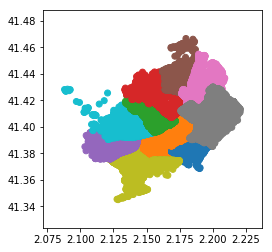

In [12]:
plt.figure(figsize=(8,8))
gdf_indexed_by_cod_distr.plot(column="N_DISTRI")

In [13]:
gdf_cit_vella_comerc = gdf_bcn_comerc[bcn_comerc["N_DISTRI"] == "Ciutat Vella"]
gdf_cit_vella_comerc.size

273525

<Figure size 360x360 with 0 Axes>

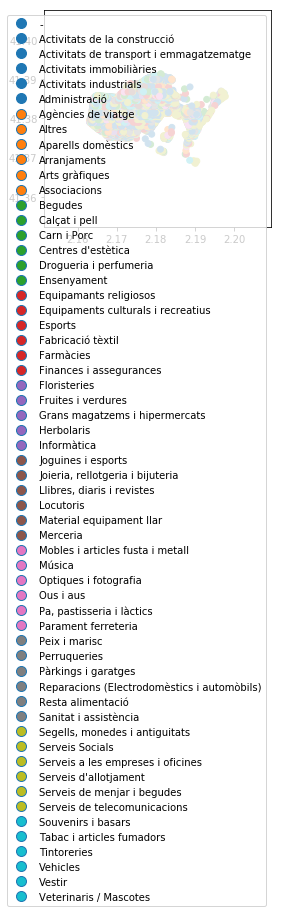

In [15]:
plt.figure(figsize=(5,5))
gdf_cit_vella_comerc.plot(column="N_ACT", legend=True)

In [55]:
pt=gdf_cit_vella_comerc.geometry[0]

2.182944

In [58]:
from ipyleaflet import (
    Map,
    Marker, MarkerCluster,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl,
    basemaps
)
gdf_cit_vella_comerc
markers = [Marker(location=(pt.x, pt.y)) for pt in gdf_cit_vella_comerc.geometry]
mc = MarkerCluster(markers=markers)

In [67]:
center = [41.382, 2.15]
zoom = 12

In [73]:
m = Map(center=center, zoom=zoom)
m.clear_layers()
m.add_layer(basemaps.OpenStreetMap.BlackAndWhite)
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[41.382, 2.15], layers=(TileLayer(attribution='&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a>', min_zoom=1, name='OpenStreetMap.BlackAndWhite', options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size'], url='http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png'),), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'])

In [75]:
m.interact(zoom=(5,15,1))

Box(children=(IntSlider(value=12, description='zoom', max=15, min=5),))

In [14]:
m = folium.Map([41.382, 2.15], zoom_start=12)
folium.GeoJson(gdf_cit_vella_comerc.iloc[0:1000]).add_to(m)
m

In [15]:
import fiona
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [16]:
gdf_cit_vella_comerc.to_file("comerç_cit_vella","GeoJSON")